In [20]:
import numpy as np
import os
import scipy 
from scipy import signal
import matplotlib.pyplot as plt
import math
import pandas as pd

In [21]:
# define body part slices
nose = np.s_[0: 2]
leftEar = np.s_[3: 5]
rightEar = np.s_[6: 8]
neck = np.s_[9: 11]
spine1 = np.s_[12: 14]
leftShoulder = np.s_[15: 17]
rightShoulder = np.s_[18: 20]
spine2 = np.s_[21: 23]
spine3 = np.s_[24: 26]
tail1 = np.s_[27: 29]
tail2 = np.s_[30: 32]
tail3 = np.s_[33: 35]
tail4 = np.s_[36: 38]
tail5 = np.s_[39: 41]

#list containing slices
bodyPartList = [nose, leftEar, rightEar, neck, spine1, leftShoulder, rightShoulder, spine2, spine3, tail1, tail2, tail3, tail4, tail5]

# dictionary containing indexes for liklihood values
liklihoodIndex = ({
    'nose' : 2, 'leftEar' : 5, 'rightEar' : 8, 'neck' : 11, 'spine1' : 14, 'leftShoulder' : 17, 'rightShoulder' : 20, 
    'spine2' : 23, 'spine3' : 26, 'tail1' : 29, 'tail2' : 32, 'tail3' : 35, 'tail4' : 38, 'tail5' : 41
})

In [22]:
def find_angle_from_3_points(A,B,C,x=0,y=1):
    """
    input points/2D coordinates A B and C
    finding the angle of points A --> B --> C. 2 vectors: BA and BC
    outputs angle in degrees
    explanation here: https://math.stackexchange.com/questions/361412
    """
    
    AB = B-A
    BC = C-B
    vecAB = np.sqrt((A.T[x]-B.T[x])**2 + (A.T[y]-B.T[y])**2)
    vecBC = np.sqrt((B.T[x]-C.T[x])**2 + (B.T[y]-C.T[y])**2)
    dots = []
    for ab, bc in zip(AB, BC):
        dots.append(np.dot(ab, bc))
    dot = np.array(dots)
    denominator = (vecAB * vecBC)
    cosine_angle = dot/denominator
    
    # inverse cosine has a domain of -1 to 1
    # however cosine (the input) has perodicity
    # therefore if an input is outside either I take a period/ interval away or add one in
    
    angles = []
    for InvCosInput in cosine_angle:
        if (InvCosInput >= -1) & (InvCosInput <= 1):
            angle = np.arccos(InvCosInput)
            angle = np.degrees(angle)
            angles.append(float(angle))
        elif InvCosInput > 1:
            angle = np.arccos(InvCosInput-2)
            angle = np.degrees(angle)
            angles.append(float(angle))
        elif InvCosInput < -1:
            angle = np.arccos(InvCosInput+2)
            angle = np.degrees(angle)
            angles.append(float(angle))
            
    return np.array(angles)

def calc_head_deflections(response, frame, bodyPartList, def_angle_range=3):
    """
    calculate the angle between the 3 points A(nose), B(neck), C(upper spine) for the rnage of frames controlled by def_angle_range - harcoded as 3
    this defines head delections
    """
    
    nose = bodyPartList[0]
    neck = bodyPartList[3]
    spine1 = bodyPartList[4]
    delection_angles = find_angle_from_3_points(response[nose].T[frame:frame+def_angle_range], 
                                                response[neck].T[frame:frame+def_angle_range], 
                                                response[spine1].T[frame:frame+def_angle_range])
    
    # average over array of the absolute values of the head deflections
    Head_deflection = np.mean(abs(delection_angles[:-1] - delection_angles[1:]))
    return Head_deflection

In [29]:
path = 'X:\ibn-vision\DATA\SUBJECTS_AB'  

new_coordinates_list = []
all_head_deflection_sessions = []
responses = []

directory_list = os.listdir(path)
for directory in directory_list:
    file_list = os.listdir(path + '/' + directory)
    for file in file_list:
        if 'processed' in file:
            response = np.load(path + '/' + directory + '/' + file)
            responses.append(response)
            frames = response.shape[1]-60
            
            Head_deflection_for_session = []
            
            for f in range(frames):
                Head_deflection = calc_head_deflections(response, f, bodyPartList, 3)
                Head_deflection_for_session.append(Head_deflection)
            Head_deflection_for_session = np.array(Head_deflection_for_session)
            np.save(path + '/' + directory + '/' + file[:-4] + 'head_deflection', Head_deflection_for_session)
            all_head_deflection_sessions.append(Head_deflection_for_session)

all_head_deflection_sessions = np.array(all_head_deflection_sessions)

In [24]:
all_head_deflection_sessions

array([[ 1.85871357,  7.98782716, 11.95389086, ...,  2.39638651,
        14.63011667, 32.4360622 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.73536477,
         1.19726192,  2.08678805],
       [ 0.80066056,  0.64429783,  0.45052698, ...,  1.67407163,
         1.70500551,  1.52917712],
       ...,
       [ 1.9918188 ,  1.44341086,  2.27674915, ...,  5.95983647,
         4.23524589,  3.25779822],
       [ 0.74293886,  0.72945725,  0.44574374, ...,  2.79492972,
         5.08617991,  5.16902774],
       [ 4.902421  ,  2.7246084 ,  7.48310115, ...,  5.52495206,
         6.65388855,  7.99013653]])

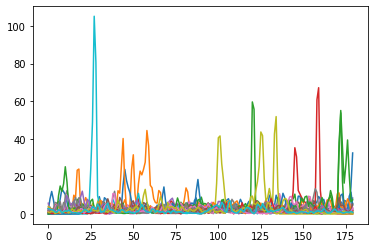

In [25]:
for i in range(20):
    plt.plot(range(0, len(Head_deflection_for_session)), all_head_deflection_sessions[i])

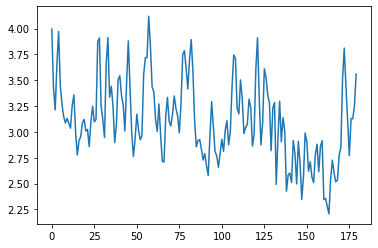

In [26]:
plt.plot(range(0, len(Head_deflection_for_session)), np.mean(all_head_deflection_sessions, axis=0))

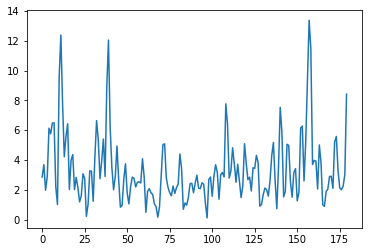

In [27]:
plt.plot(range(0, len(Head_deflection_for_session)), all_head_deflection_sessions[7])